In [91]:
'''import cv2

def extract_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = 0
    while True:
        # Read the next frame
        ret, frame = cap.read()
        # Break the loop if we have reached the end of the video
        if not ret:
            break
        frame_filename = f"{output_folder}/frame_{frame_count:04d}.jpg"
        cv2.imwrite(frame_filename, frame)
        print(f"Extracted frame {frame_count}")
        frame_count += 1
    cap.release()
    print(f"Frames extracted: {frame_count}")
    print(f"Frames per second (fps): {fps}")

# Example usage
video_path = "videos/video1.mp4"
output_folder = "video1"
extract_frames(video_path, output_folder)
'''

'import cv2\n\ndef extract_frames(video_path, output_folder):\n    cap = cv2.VideoCapture(video_path)\n    if not cap.isOpened():\n        print("Error opening video file")\n        return\n    fps = int(cap.get(cv2.CAP_PROP_FPS))\n    frame_count = 0\n    while True:\n        # Read the next frame\n        ret, frame = cap.read()\n        # Break the loop if we have reached the end of the video\n        if not ret:\n            break\n        frame_filename = f"{output_folder}/frame_{frame_count:04d}.jpg"\n        cv2.imwrite(frame_filename, frame)\n        print(f"Extracted frame {frame_count}")\n        frame_count += 1\n    cap.release()\n    print(f"Frames extracted: {frame_count}")\n    print(f"Frames per second (fps): {fps}")\n\n# Example usage\nvideo_path = "videos/video1.mp4"\noutput_folder = "video1"\nextract_frames(video_path, output_folder)\n'

In [92]:
'''import cv2
import imutils

# Initializing the HOG person
# detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

cap = cv2.VideoCapture('videos/video3.mp4')

while cap.isOpened():
	# Reading the video stream
	ret, image = cap.read()
	if ret:
		image = imutils.resize(image, 
							width=min(900, image.shape[1]))

		# Detecting all the regions 
		# in the Image that has a 
		# pedestrians inside it
		(regions, _) = hog.detectMultiScale(image,
											winStride=(4, 4),
											padding=(4, 4),
											scale=.2)

		# Drawing the regions in the 
		# Image
		for (x, y, w, h) in regions:
			cv2.rectangle(image, (x, y),
						(x + w, y + h), 
						(0, 0, 255), 2)

		# Showing the output Image
		cv2.imshow("Image", image)
		if cv2.waitKey(25) & 0xFF == ord('q'):
			break
	else:
		break

cap.release()
cv2.destroyAllWindows()
'''

'import cv2\nimport imutils\n\n# Initializing the HOG person\n# detector\nhog = cv2.HOGDescriptor()\nhog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())\n\ncap = cv2.VideoCapture(\'videos/video3.mp4\')\n\nwhile cap.isOpened():\n\t# Reading the video stream\n\tret, image = cap.read()\n\tif ret:\n\t\timage = imutils.resize(image, \n\t\t\t\t\t\t\twidth=min(900, image.shape[1]))\n\n\t\t# Detecting all the regions \n\t\t# in the Image that has a \n\t\t# pedestrians inside it\n\t\t(regions, _) = hog.detectMultiScale(image,\n\t\t\t\t\t\t\t\t\t\t\twinStride=(4, 4),\n\t\t\t\t\t\t\t\t\t\t\tpadding=(4, 4),\n\t\t\t\t\t\t\t\t\t\t\tscale=.2)\n\n\t\t# Drawing the regions in the \n\t\t# Image\n\t\tfor (x, y, w, h) in regions:\n\t\t\tcv2.rectangle(image, (x, y),\n\t\t\t\t\t\t(x + w, y + h), \n\t\t\t\t\t\t(0, 0, 255), 2)\n\n\t\t# Showing the output Image\n\t\tcv2.imshow("Image", image)\n\t\tif cv2.waitKey(25) & 0xFF == ord(\'q\'):\n\t\t\tbreak\n\telse:\n\t\tbreak\n\ncap.release()\ncv2.destr

In [93]:
'''import cv2

cap = cv2.VideoCapture('videos/video3.mp4')
pedestrian_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')
cars_cascade = cv2.CascadeClassifier('cars.xml')

while True:
    # reads frames from a video
    ret, frames = cap.read()
    
    # convert to gray scale of each frame
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
    
    # Detect pedestrians of different sizes in the input image
    pedestrians = pedestrian_cascade.detectMultiScale(frames, 1.1, 2)
    
    # Draw rectangles and labels for pedestrians
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(frames, (x, y), (x+w, y+h), (0, 255, 0), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frames, 'Person', (x + 6, y - 6), font, 0.5, (0, 255, 0), 1)
    
    # Detect cars of different sizes in the input image
    cars = cars_cascade.detectMultiScale(frames, 1.1, 3)
    
    # Draw rectangles and labels for cars
    for (x, y, w, h) in cars:
        cv2.rectangle(frames, (x, y), (x+w, y+h), (0, 0, 255), 1)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frames, 'Car', (x + 6, y - 6), font, 0.5, (0, 0, 255), 1)
    
    # Display frames in a window
    cv2.imshow('Object Detection', frames)
    
    # Wait for the 'q' key to stop
    if cv2.waitKey(33) == ord('q'):
        break

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()'''
    

"import cv2\n\ncap = cv2.VideoCapture('videos/video3.mp4')\npedestrian_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')\ncars_cascade = cv2.CascadeClassifier('cars.xml')\n\nwhile True:\n    # reads frames from a video\n    ret, frames = cap.read()\n    \n    # convert to gray scale of each frame\n    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)\n    \n    # Detect pedestrians of different sizes in the input image\n    pedestrians = pedestrian_cascade.detectMultiScale(frames, 1.1, 2)\n    \n    # Draw rectangles and labels for pedestrians\n    for (x, y, w, h) in pedestrians:\n        cv2.rectangle(frames, (x, y), (x+w, y+h), (0, 255, 0), 2)\n        font = cv2.FONT_HERSHEY_DUPLEX\n        cv2.putText(frames, 'Person', (x + 6, y - 6), font, 0.5, (0, 255, 0), 1)\n    \n    # Detect cars of different sizes in the input image\n    cars = cars_cascade.detectMultiScale(frames, 1.1, 3)\n    \n    # Draw rectangles and labels for cars\n    for (x, y, w, h) in cars:\n        cv2.r

In [94]:
import os
from glob import glob
import re
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from motion_detection_utils import *

In [95]:
cap = cv2.VideoCapture('videos/video5.mp4')

# Lee el primer frame
ret1, frame1 = cap.read()

# Lee el segundo frame
ret2, frame2 = cap.read()

# Verifica que ambos frames se hayan leído correctamente
if not ret1 or not ret2:
    print("No se pudieron leer los frames. Fin del video.")

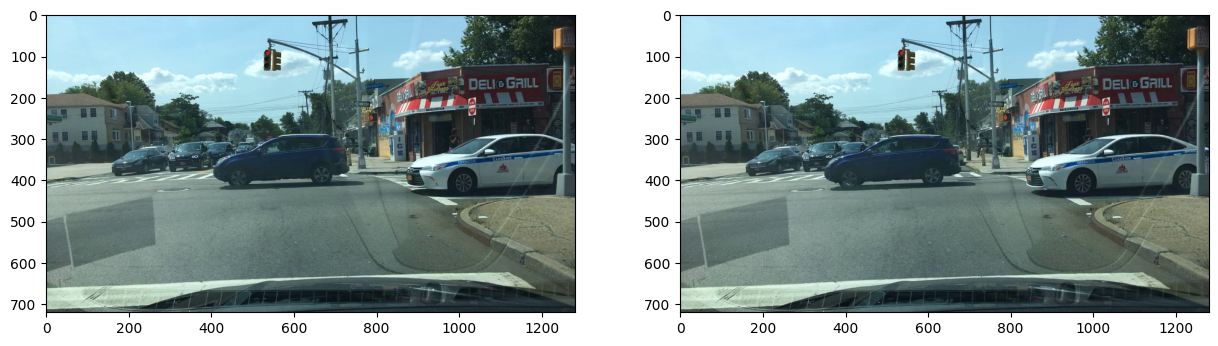

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB));

In [97]:
def compute_flow(frame1, frame2):
    # convert to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # blurr image
    gray1 = cv2.GaussianBlur(gray1, dst=None, ksize=(3,3), sigmaX=5)
    gray2 = cv2.GaussianBlur(gray2, dst=None, ksize=(3,3), sigmaX=5)

    flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None,
                                        pyr_scale=0.75,
                                        levels=3,
                                        winsize=5,
                                        iterations=3,
                                        poly_n=10,
                                        poly_sigma=1.2,
                                        flags=0)
    return flow


def get_flow_viz(flow):
    """ Obtains BGR image to Visualize the Optical Flow 
        """
    hsv = np.zeros((flow.shape[0], flow.shape[1], 3), dtype=np.uint8)
    hsv[..., 1] = 255

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return rgb

C:\Users\Daphne\AppData\Local\Temp\ipykernel_32296\1092938990.py:17: RuntimeWarning: divide by zero encountered in log
  ax[2].imshow(np.log(mag/mag.max()), cmap='hsv_r') # try other cmaps 'hsv_r', 'gist_earth_r', 'rainbow_r', 'twilight_r'


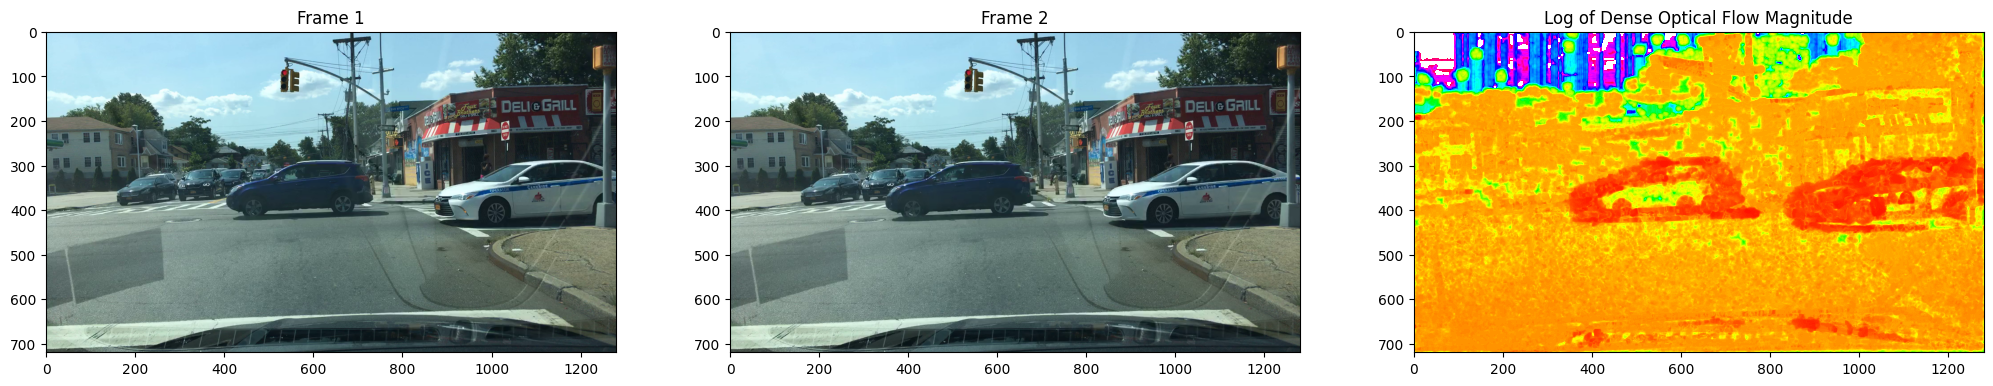

In [98]:
flow = compute_flow(frame1, frame2)

# separate into magntiude and angle
#Calculates the magnitude and angle of 2D vectors.
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])


img1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

# display
fig, ax = plt.subplots(1, 3, figsize=(25, 25))
ax[0].imshow(img1_rgb)
ax[0].set_title('Frame 1')
ax[1].imshow(img2_rgb)
ax[1].set_title('Frame 2')
ax[2].imshow(np.log(mag/mag.max()), cmap='hsv_r') # try other cmaps 'hsv_r', 'gist_earth_r', 'rainbow_r', 'twilight_r'
ax[2].set_title('Log of Dense Optical Flow Magnitude');

In [99]:
def get_motion_mask(flow_mag, motion_thresh=1, kernel=np.ones((7,7))):
    """ Obtains Detection Mask from Optical Flow Magnitude
        Inputs:
            flow_mag (array) Optical Flow magnitude
            motion_thresh - thresold to determine motion
            kernel - kernal for Morphological Operations
        Outputs:
            motion_mask - Binray Motion Mask
        """
    motion_mask = np.uint8(flow_mag > motion_thresh)*255
    motion_mask = cv2.erode(motion_mask, kernel, iterations=1)
    motion_mask = cv2.morphologyEx(motion_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    motion_mask = cv2.morphologyEx(motion_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    
    return motion_mask

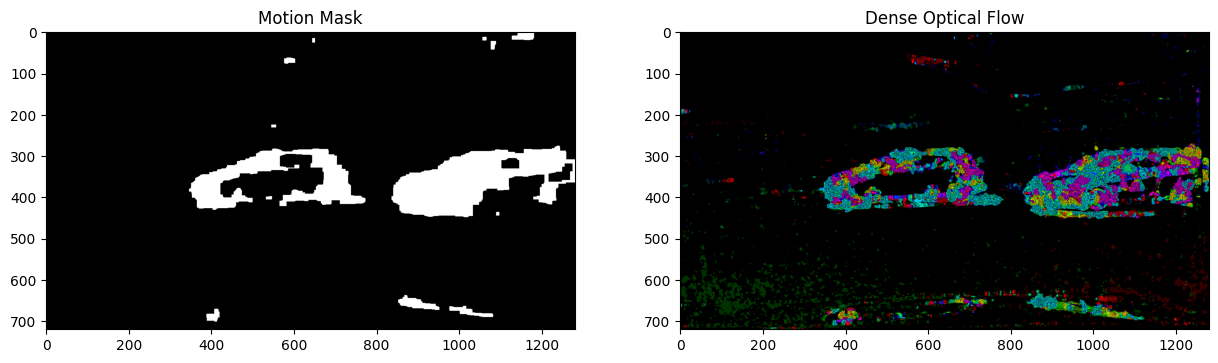

In [100]:
rgb = get_flow_viz(flow)

# get variable motion thresh based on prior knowledge of camera position
motion_thresh = np.c_[np.linspace(0.3, 1, frame1.shape[0])].repeat(frame1.shape[1], axis=-1)

# get motion mask
mask = get_motion_mask(mag, motion_thresh=motion_thresh)

# display
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Motion Mask")
ax[1].imshow(rgb*50) # scale RGB to see the noise
ax[1].set_title("Dense Optical Flow");

In [101]:
def get_contour_detections_2(mask, ang=ang, angle_thresh=2, thresh=400):
    """ Obtains initial proposed detections from contours discoverd on the
        mask. Scores are taken as the bbox area, larger is higher.
        Inputs:
            mask - thresholded image mask
            angle_thresh - threshold for flow angle standard deviation
            thresh - threshold for contour size
        Outputs:
            detectons - array of proposed detection bounding boxes and scores 
                        [[x1,y1,x2,y2,s]]
        """
    # get mask contours
    contours, _ = cv2.findContours(mask, 
                                   cv2.RETR_EXTERNAL, # cv2.RETR_TREE, 
                                   cv2.CHAIN_APPROX_TC89_L1)
    temp_mask = np.zeros_like(mask) # used to get flow angle of contours
    angle_thresh = angle_thresh*ang.std()
    detections = []
    for cnt in contours:
        # get area of contour
        x,y,w,h = cv2.boundingRect(cnt)
        area = w*h

        # get flow angle inside of contour
        cv2.drawContours(temp_mask, [cnt], 0, (255,), -1)
        flow_angle = ang[np.nonzero(temp_mask)]

        if (area > thresh) and (flow_angle.std() < angle_thresh): # hyperparameter
            detections.append([x,y,x+w,y+h, area])

    return np.array(detections)

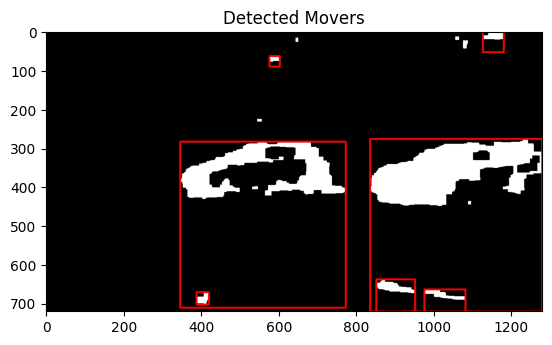

In [102]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
detections = get_contour_detections_2(mask, ang, angle_thresh=2, thresh=400)
# detections = get_contour_detections(mask, thresh=400)

# separate bboxes and scores
bboxes = detections[:, :4]
scores = detections[:, -1]

for box in bboxes:
    x1, y1, x2, y2 = box
    
    # Encuentra la medida más larga del rectángulo
    max_side = max(x2 - x1, y2 - y1)
    
    # Ajusta las coordenadas para formar un cuadrado
    x2 = x1 + max_side
    y2 = y1 + max_side
    
    # Dibuja un cuadrado en lugar de un rectángulo
    cv2.rectangle(mask_rgb, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(mask_rgb)
plt.title("Detected Movers");

In [103]:
nms_bboxes = non_max_suppression(bboxes, scores, threshold=0.1)
len(bboxes), len(nms_bboxes)

(7, 7)

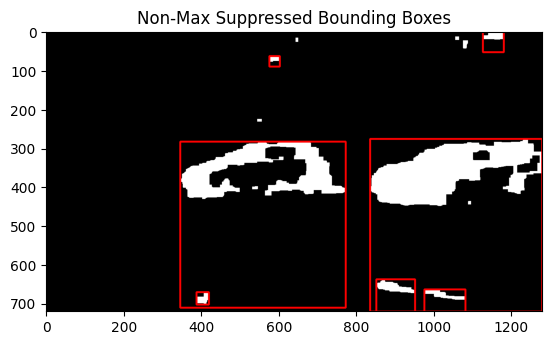

In [104]:
mask_rgb_detections = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
for det in nms_bboxes:
    x1, y1, x2, y2 = det
    
    # Encuentra la medida más larga del rectángulo
    max_side = max(x2 - x1, y2 - y1)
    
    # Ajusta las coordenadas para formar un cuadrado
    x2 = x1 + max_side
    y2 = y1 + max_side
    
    # Dibuja un cuadrado en lugar de un rectángulo
    cv2.rectangle(mask_rgb_detections, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(mask_rgb_detections)
plt.title("Non-Max Suppressed Bounding Boxes");

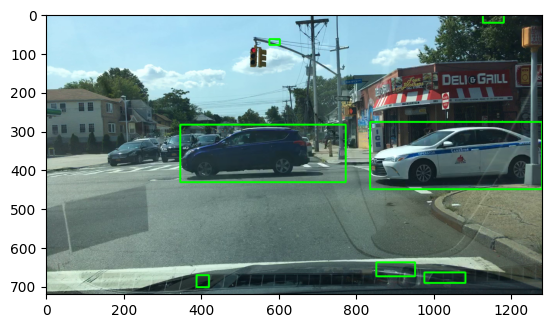

In [105]:
frame2 = img2_rgb.copy()
draw_bboxes(frame2, nms_bboxes)
plt.imshow(frame2);

In [106]:
def get_detections(frame1, frame2, motion_thresh=1, bbox_thresh=400, nms_thresh=0.1, mask_kernel=np.ones((7,7), dtype=np.uint8)):
    """ Main function to get detections via Frame Differencing
        Inputs:
            frame1 - Grayscale frame at time t
            frame2 - Grayscale frame at time t + 1
            motion_thresh - Minimum flow threshold for motion
            bbox_thresh - Minimum threshold area for declaring a bounding box 
            nms_thresh - IOU threshold for computing Non-Maximal Supression
            mask_kernel - kernel for morphological operations on motion mask
        Outputs:
            detections - list with bounding box locations of all detections
                bounding boxes are in the form of: (xmin, ymin, xmax, ymax)
        """
    # get optical flow
    flow = compute_flow(frame1, frame2)

    # separate into magntiude and angle
    mag, _ = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    motion_mask = get_motion_mask(mag, motion_thresh=motion_thresh, kernel=mask_kernel)

    # get initially proposed detections from contours
    detections = get_contour_detections(motion_mask, bbox_thresh)

    # separate bboxes and scores
    bboxes = detections[:, :4]
    scores = detections[:, -1]

    # perform Non-Maximal Supression on initial detections
    return non_max_suppression(bboxes, scores, threshold=nms_thresh)